In [1]:
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
from numpy import unique, where
from wordcloud import WordCloud, STOPWORDS

In [3]:
# For Stage 1 of my ACNH Review Project Results, I focused on the inital clustering
# of positive vs. negative reviews written by users. 

# The model to predict this category is trained based on the grades given
# for each review, while clustering both the review and its corresponding grade
# as a key:value pair.

# The goal for this phase was to find most common words that may define a positive
# vs. a negative review and prepare the dataset for further textual analysis
# if there is not enough variety between the two clusters to tell at this time.


In [2]:
# Preparing the dataset
# User review grades for Animal Crossing on the scale of 1-10

cols = ["grade", "user_name", "text"] 
ug = pd.read_csv("user_reviews.csv", usecols=[cols[0]])
us = pd.read_csv("user_reviews.csv", usecols=[cols[1]])
ut = pd.read_csv("user_reviews.csv", usecols=[cols[2]])

# Each column is converted to a list for data storage in a dictionary.
user_grades = ug.to_numpy()
user_names = us.to_numpy()
user_reviews = ut.to_numpy()

# The descriptive statistics show a mean of a relative negative grade of 4.217406, with the upper
# and lower quartile grades being on the extremes of 10 and 0 respectively.
ug.describe()

,grade
count,2999.000000
mean,4.217406
std,4.349486
min,0.000000
25%,0.000000
50%,2.000000
75%,10.000000
max,10.000000


In [3]:
# A preview of the first 10 reviews in the dataset:
pd.read_csv("user_reviews.csv", usecols=cols).head(10)

,grade,user_name,text
0,4,mds27272,My gf started playing before me. No option to ...
1,5,lolo2178,"While the game itself is great, really relaxin..."
2,0,Roachant,My wife and I were looking forward to playing ...
3,0,Houndf,We need equal values and opportunities for all...
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...
5,0,tb726,The limitation of one island per Switch (not p...
6,0,Outryder86,I was very excited for this new installment of...
7,0,Subby89,It's 2020 and for some reason Nintendo has dec...
8,0,RocketRon,This is so annoying. Only one player has the a...
9,0,chankills,I purchased this game for my household (me and...


In [4]:
# Preprocessing:
    # Reduce redundant vocabulary in the reviews by removing stop words.

    # I added a few game-related words that tend to appear a lot regardless of whether a
    # review has positive or negative sentiment.
for x in ["game", "play", "nintendo", "animal crossing", "new horizons"]: STOPWORDS.add(x)

    # Remove stop words from user reviews
for i in range(len(user_reviews)):
    list_r = user_reviews[i][0].split()
    for w in list_r:
        if w.lower() in STOPWORDS:
            list_r.remove(w)
    new_word = " ".join(list_r)
    new_word = f"{user_names[i][0]} " + new_word
    user_reviews[i][0] = new_word


In [9]:
# Splitting the dataset into training and test data with 2-Fold cross validation.
# The split is about halfway: Training data is of length 1499, test data is of length 1500.

from sklearn.model_selection import KFold

    # Prepare cross validation
kfold = KFold(n_splits=2, shuffle=True)

    # User grades training and test data:
user_grades_training = []
user_grades_test = []

    # Store the sets of training and test data:
for train, test in kfold.split(user_grades):
	user_grades_training.append(user_grades[train])
	user_grades_test.append(user_grades[test])

    # User reviews training and test data:
user_reviews_training = []
user_reviews_test = []

    # Store the sets of training and test data:
for train, test in kfold.split(user_reviews):
	user_reviews_training.append(user_reviews[train])
	user_reviews_test.append(user_reviews[test])


In [6]:
    # Construct splits of training data as dictionaries:

user_dict_train1 = {t[0]:g[0] for (t, g) in zip(user_reviews_training[0], user_grades_training[0])}
user_dict_train2 = {t[0]:g[0] for (t, g) in zip(user_reviews_training[1], user_grades_training[1])}

    # Another dictionary for the testing data:
user_dict_test1 = {t[0]:g[0] for (t, g) in zip(user_reviews_test[0], user_grades_test[0])}
user_dict_test2 = {t[0]:g[0] for (t, g) in zip(user_reviews_test[1], user_grades_test[1])}

# References:
# https://chatgpt.com/share/6751ee43-f1fc-8000-a087-4d6475ddc698
# https://chatgpt.com/share/674fd269-9a7c-8000-addd-cc3fe5f6c560

In [7]:
# This is the first model training for the first fold of training data.

# Sort training data into 2 clusters: 
# Positive reviews and Negative reviews

# Algorithm used: Spectral Clustering
# Code taken and modified from Lab 10 tutorial.

from sklearn.cluster import SpectralClustering

# Define dataset
X = np.array(user_grades_training[0]).reshape(-1, 1)

# Define the model
model = SpectralClustering(n_clusters=2)

# Fit model and predict clusters
yhat = model.fit_predict(X)

# Retrieve unique clusters
clusters = unique(yhat)

	# Organize clusters as a list of lists representing each cluster
user_clusters = [[] for cluster in clusters] 						# OR:    # user_clusters = {"cluster_1" : None, "cluster_2" : None }
										     								 # Change to dict of dicts for Final Results?
for cluster in clusters:
		# All indices in the dataset such that the dataset element at that index is in the current cluster:
	row_ix = where(yhat == cluster)
		
		# Store these corresponding key:value pairs in the dataset dictionary into a cluster.
	for i in row_ix[0]:
		kv = list(user_dict_train1.items())[int(i)]
		user_clusters[int(cluster)].append(kv)

print("Training data split 1")
print("Negative reviews:", user_clusters[0])
print("Positive reviews:", user_clusters[1])

Training data split 1
Negative reviews: [('Houndf need equal values opportunities all players the island! wife the first player, is great want wait progress. the time, I do not want her to a second class player experience I the founder. Fix Nintendo!!', 0), ('ProfessorFox BEWARE! you multiple people your house want play account (island). ONE customizable island be played per Switch. Even you buy two copies you will still be able customize ONE island. 3 kids want play game want customize island - THEY CANT!BEWARE! you multiple people your house want play game they each have their own account (island). ONE customizable island can be played per Switch. Even you buy two copies the game you will still be able customize ONE island. have 3 kids want play game they each want customize their own island - THEY CANT! is absolutely unacceptable. Maybe the dumbest thing has done. have owned every console the original NES I can not think a worse decision Nintendo.… Expand', 0), ("Outryder86 excited 

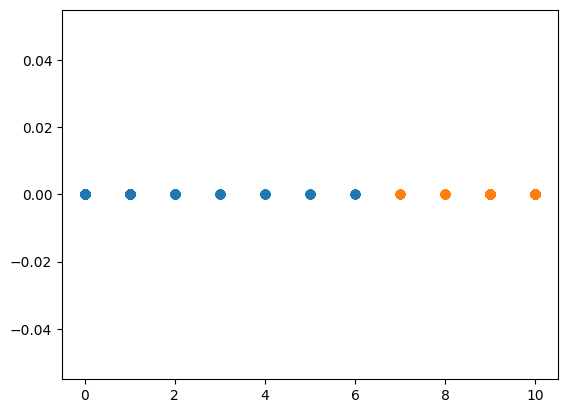

In [8]:
    # Create scatter plot of these samples:
for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], [np.zeros(len(X[row_ix, 0][0]))])

	# Show the plot:
pyplot.show()

# Blue / Grades 0-6 are negative reviews
# Orange / Grades 7-10 are positive reviews 

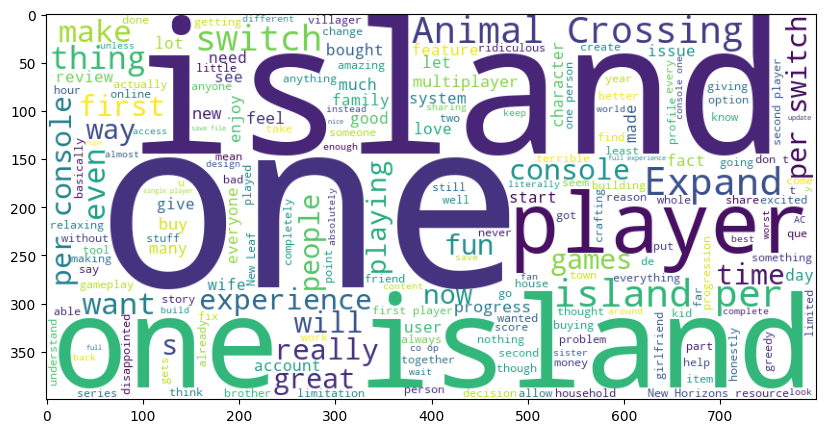

In [9]:
# Word cloud of most commonly used words for negative user reviews:
neg_user_review_text1 = " ".join(review[0] for review in user_clusters[0])

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(neg_user_review_text1)

# Display the generated word cloud
pyplot.figure(figsize=(10, 5))
pyplot.imshow(wc)
pyplot.show()

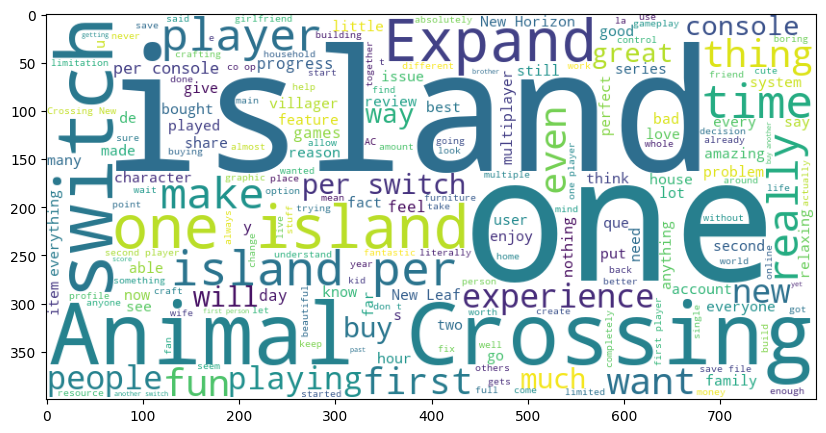

In [10]:
# Word cloud of most commonly used words for positive user reviews:
pos_user_review_text1 = " ".join(review[0] for review in user_clusters[1])

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(pos_user_review_text1)

# Display the generated word cloud
pyplot.figure(figsize=(10, 5))
pyplot.imshow(wc)
pyplot.show()

In [11]:
# This is the second model training for the first fold of training data.

# Sort training data into 2 features: 
# Positive reviews (upper half), Negative reviews (lower half)

# Algorithm used: Spectral Clustering
# Code taken and modified from Lab 10 tutorial.

from sklearn.cluster import SpectralClustering

# Define dataset
X = np.array(user_grades_training[1]).reshape(-1, 1)

# Define the model
model = SpectralClustering(n_clusters=2)

# Fit model and predict clusters
yhat = model.fit_predict(X)

# Retrieve unique clusters
clusters = unique(yhat)

	# Organize clusters as a list of lists representing each cluster
user_clusters = [[] for cluster in clusters] 						# OR:    # user_clusters = {"cluster_1" : None, "cluster_2" : None }
										     								 # Change to dict of dicts for Final Results?
for cluster in clusters:
		# All indices in the dataset such that the dataset element at that index is in the current cluster:
	row_ix = where(yhat == cluster)
		# Store these corresponding key:value pairs in the dataset dictionary into a cluster.
	for i in row_ix[0]:
		kv = list(user_dict_train2.items())[int(i)]
		user_clusters[int(cluster)].append(kv)

print("Training data split 2")
print("Negative reviews:", user_clusters[0])
print("Positive reviews:", user_clusters[1])

Training data split 2
Positive reviews: [('Roachant wife looking forward playing it released. bought it, let play first made island played a bit. decided play discover Nintendo allows one island per switch! that, second player build anything island tool building considerably harder do. So, more one personMy wife looking forward playing game it released. I bought it, I let play first made island played a bit. I decided play discover Nintendo only allows one island per switch! only that, second player build anything island tool building considerably harder to do. So, more one person your home wants to play the game, you need two switches. Worst decision I have seen, even beats EA.Congratulations Nintendo, you have officially become the worst video game company year!… Expand', 4), ('Houndf need equal values opportunities all players the island! wife the first player, is great want wait progress. the time, I do not want her to a second class player experience I the founder. Fix Nintendo!!'

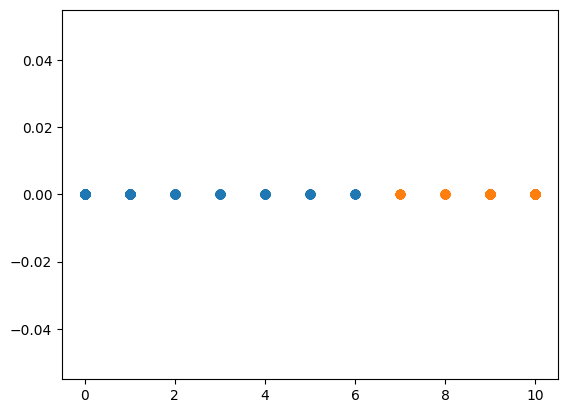

In [12]:
    # Create scatter plot of these samples:
for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], [np.zeros(len(X[row_ix, 0][0]))])

	# Show the plot:
pyplot.show()


# Orange / Grades 0-6 are negative reviews
# Blue / Grades 7-10 are positive reviews 

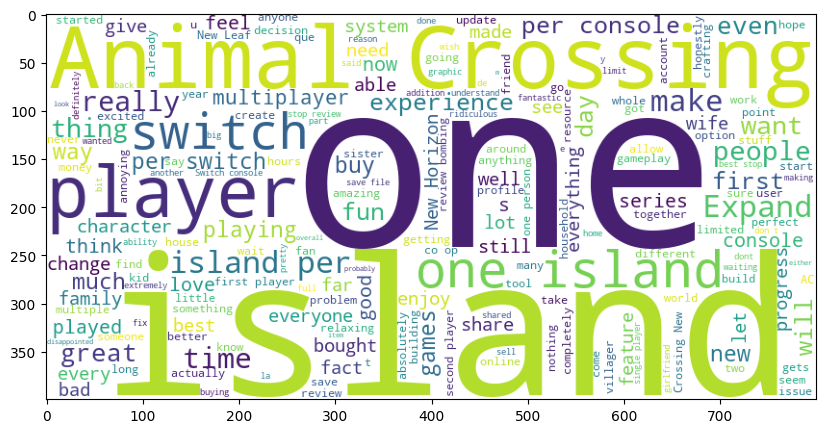

In [13]:
# Word cloud of most commonly used words for negative user reviews:
pos_user_review_text2 = " ".join(review[0] for review in user_clusters[1])

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(pos_user_review_text2)

# Display the generated word cloud
pyplot.figure(figsize=(10, 5))
pyplot.imshow(wc)
pyplot.show()

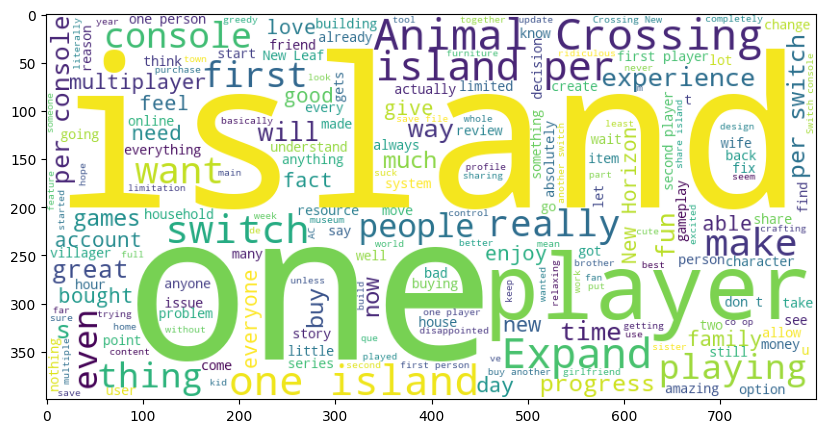

In [14]:
# Word cloud of most commonly used words for positive user reviews:
neg_user_review_text2 = " ".join(review[0] for review in user_clusters[0])

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(neg_user_review_text2)

# Display the generated word cloud
pyplot.figure(figsize=(10, 5))
pyplot.imshow(wc)
pyplot.show()

# For this second fold, the positive review cluster seems to hold a greater variety
# of most common words, whereas in the first fold there was a lot of overlap with the words
# "one", "island", "one island", and "island per".  Both folds show overlap with the word "expand" also.

In [ ]:
# 1. What parameters did you use?
    # I used k-fold cross validation and spectral clustering algorithms from the sklearn library.
    # For k-fold, I used KFold(n_splits=2, shuffle=True).  I set shuffle to True to ensure a higher degree of randomness
    # and did 2 splits to see if consistent patterns can be caught during training. I kept the default setting of
    # splitting the training and test data 50/50 for both folds.
    # For spectral clustering I used SpectralClustering(n_clusters=2) to place the data into 2 clusters, 
    # one for positive reviews and the other for negative reviews.

# 2. Train your algorithms on the training data provided. What accuracy are you expecting on the test set? How did you get this estimate?
    # The way it is right now I think the testing accuracy will not be so accurate
    # This estimation is from my intuition based on what I see in the wordcloud - the most common words and bigrams are largely the same for
    # both positive and negative reviews, including "one", "island", "player", "one island", "island per".
    # I think this is a good pattern caught - all reviewers seem to have a similar subject in common. 
    # However, if the goal is to predict that a review is positive or negative based
    # on words, then predictions can still be muddy due to their high similarity.

# 4. How will you improve this accuracy?
    # As I continue working on this project, I am aiming to learn more about featuere extraction and PCA and how to apply it to text data.
    # The goal is to be able to capture what is unique about each cluster or if there are word or sentence frequencies that separate 
    # Currently my plan is to do some further sub-clustering of the clusters based on the most frequently used words' most common neighboring
    # words, or look at common phrases / bigrams rather than only solo words.
    # In the research process I am learning about the bag-of-words algorithm and other ways to hopefully get an accurate numerical representation
    # on the difference between positive and negative reviews.

# 5. Clearly explain what you took away from this assignment.
    # In this phase of training, I was challenged to learn about ways to structure a dataset that works with both text and numerical data.
    # Clustering was another huge aspect of the project so far, where I chose to cluster based on the review grade but used the dictionary mapping
    # to have the review text associated with each grade to be included in the cluster as well.
    # A challenge is how to store and work with 2D data storage of review text mapped to a grade number, where the text can be seen as multi-dimensional
    # due to the variety of words where the grade is just a singular, 1D integer.